In [1]:
from selenium.webdriver import Chrome
import time
import os
import pandas as pd
from selenium import webdriver
from urllib.parse import quote
import pandas as pd
# 크롬 웹브라우저 실행
path = "chromedriver.exe"

In [8]:
# 빈창 만들기
options = webdriver.ChromeOptions()
options.add_argument('--start-maximized')

driver = webdriver.Chrome('chromedriver', options = options)
url_list = []
title=[]
name=[]
day=[]
content_list = ""
text = "아이오닉5 시승기"
 
for i in range(1, 2):  # 1~2페이지까지의 블로그 내용을 읽어옴
    url = 'https://section.blog.naver.com/Search/Post.nhn?pageNo='+ str(i) + '&rangeType=ALL&orderBy=sim&keyword=' + text
    driver.get(url)
    time.sleep(0.5)
 
    for j in range(1, 3): # 각 블로그 주소 저장(8개로!)
        url_titles = driver.find_element_by_xpath('/html/body/ui-view/div/main/div/div/section/div[2]/div['+str(j)+']/div/div[1]/div[1]/a[1]')
        url_title = url_titles.get_attribute('href')
        url_list.append(url_title)

        titles=driver.find_element_by_css_selector('#content > section > div.area_list_search > div:nth-child({}) > div > div.info_post > div.desc > a.desc_inner > strong > span'.format(j)).text
        title.append(titles)
        
        names=driver.find_element_by_css_selector('#content > section > div.area_list_search > div:nth-child({}) > div > div.info_post > div.writer_info > a > em'.format(j)).text
        name.append(names)

        days=driver.find_element_by_css_selector('#content > section > div.area_list_search > div:nth-child({}) > div > div.info_post > div.writer_info > span.date'.format(j)).text
        day.append(days)
                       
        
print("url 수집 끝, 해당 url 데이터 크롤링")

result=[]

for url in url_list: # 수집한 url 만큼 반복
    driver.get(url) # 해당 url로 이동
 
    driver.switch_to.frame('mainFrame')
    overlays = ".se-component.se-text.se-l-default" # 내용 크롤링
    contents = driver.find_elements_by_css_selector(overlays)
 
    for content in contents:
        content_list = content_list+content.text # content_list 라는 값에 + 하면서 점점 누적
    
    result.append(content_list)
    content_list=''    

    
## result라는 최종 데이터 프레임 생성
result=pd.DataFrame(result) #리뷰로 먼저 만들고
result['url']=url_list # url 새로운 열로 추가
result['title']=title
result['name']=name
result['day']=day


print("크롤링도 끝")
driver.quit()

url 수집 끝, 해당 url 데이터 크롤링
크롤링도 끝


In [9]:
result

,0,url,title,name,day
0,안녕하세요 더블노블입니다 ^^\n자동차 블로거 8년차 더블노블\n오늘은 시승기 포스...,https://blog.naver.com/marcia011/222319924722,현대 순수 전기차 아이오닉5 프레스티지 롱레인지 시승행사 참석 시승기,더블노블,2021. 4. 23.
1,굿모닝 앤드류입니다.\n시승하길 손꼽아 기다린 아이오닉5를 5일간 시승해보았습니다...,https://blog.naver.com/hwan35482/222357608526,현대 아이오닉5 롱레인지 2WD 시승기,앤드류,2021. 5. 19.


In [99]:
from konlpy.tag import Okt
from nltk import Text
from matplotlib import font_manager, rc
from wordcloud import WordCloud
 
import matplotlib.pyplot as plt
import time

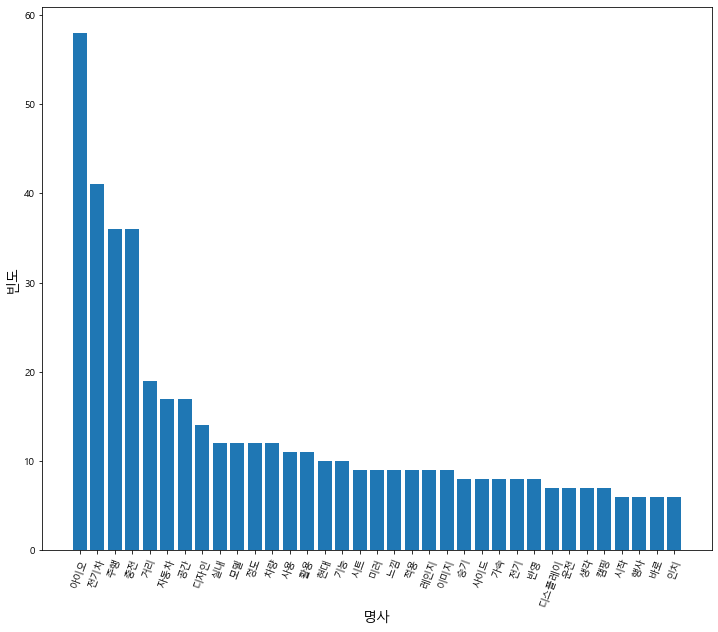

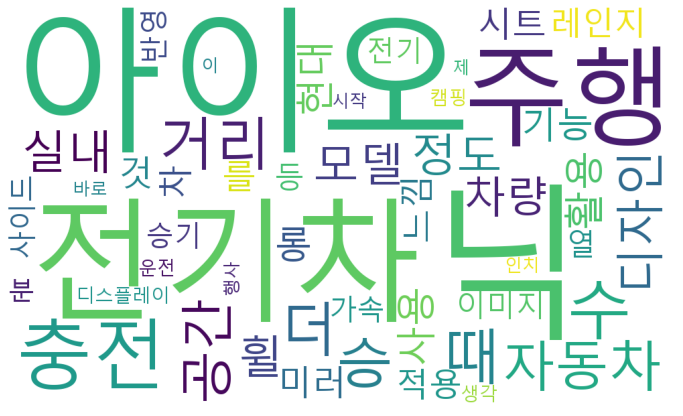

In [100]:
# 트위터에서 만든 소셜 분석을 위한 형태소 분석기 Okt 사용
okt = Okt()
myList = okt.pos(content_list, norm=True, stem=True) # 모든 형태소 추출
myList_filter = [x for x, y in myList if y in ['Noun']] # 추출된 값 중 동사만 추출
 
Okt = Text(myList_filter, name="Okt")
 
# 그래프에서 한글이 출력이 안되는 문제 해결 (ㅁㅁㅁ 처럼 출력됨)
font_location = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)
 
 
# 그래프에서 x, y 값을 설정
wordInfo = dict()
for tags, counts in Okt.vocab().most_common(50):
    if(len(str(tags)) > 1):
        wordInfo[tags] = counts
 
values = sorted(wordInfo.values(), reverse=True)
keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
 
# 그래프 값 설정
plt.figure(figsize = (12,10))
plt.bar(range(len(wordInfo)), values, align='center')
# 그래프 x, y 라벨 설정
plt.xlabel("명사",fontsize = 14)
plt.ylabel("빈도",fontsize = 14)
plt.xticks(range(len(wordInfo)), list(keys), rotation='70')
plt.show()
 
 
# wordCloud 출력
plt.figure(figsize = (12,10))
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_location, max_words=50)
plt.imshow(wc.generate_from_frequencies(Okt.vocab()))
plt.axis("off")
plt.show()
